In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
ndf=pd.read_csv("news.csv")
df=pd.read_csv("news.csv")

In [68]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [102]:
df['text']=df['title']+df['text']
df['length']=df['text'].apply(len)

In [103]:
df.head()

,Unnamed: 0,title,text,label,title length,length
0,8476,You Can Smell Hillary’s Fear,"You Can Smell Hillary’s FearDaniel Greenfield,...",FAKE,28,7546
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,85,2731
2,3608,Kerry to go to Paris in gesture of sympathy,Kerry to go to Paris in gesture of sympathyU.S...,REAL,43,2586
3,10142,Bernie supporters on Twitter erupt in anger ag...,Bernie supporters on Twitter erupt in anger ag...,FAKE,84,2744
4,875,The Battle of New York: Why This Primary Matters,The Battle of New York: Why This Primary Matte...,REAL,48,1888


In [104]:
df.drop('Unnamed: 0',axis=1)

,title,text,label,title length,length
0,You Can Smell Hillary’s Fear,"You Can Smell Hillary’s FearDaniel Greenfield,...",FAKE,28,7546
1,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,85,2731
2,Kerry to go to Paris in gesture of sympathy,Kerry to go to Paris in gesture of sympathyU.S...,REAL,43,2586
3,Bernie supporters on Twitter erupt in anger ag...,Bernie supporters on Twitter erupt in anger ag...,FAKE,84,2744
4,The Battle of New York: Why This Primary Matters,The Battle of New York: Why This Primary Matte...,REAL,48,1888
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,State Department says it can't find emails fro...,REAL,69,4145
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,14382
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE,66,12040
6333,"In Ethiopia, Obama seeks progress on peace, se...","In Ethiopia, Obama seeks progress on peace, se...",REAL,67,7058


In [105]:
df.describe()

,Unnamed: 0,title length,length
count,6335.000000,6335.000000,6335.000000
mean,5280.415627,65.277664,4772.528019
std,3038.503953,23.733657,5091.586399
min,2.000000,1.000000,13.000000
25%,2674.500000,49.000000,1803.500000
50%,5271.000000,64.000000,3708.000000
75%,7901.000000,78.000000,6253.500000
max,10557.000000,289.000000,115447.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 6 columns):
Unnamed: 0      6335 non-null int64
title           6335 non-null object
text            6335 non-null object
label           6335 non-null object
title length    6335 non-null int64
length          6335 non-null int64
dtypes: int64(3), object(3)
memory usage: 297.1+ KB


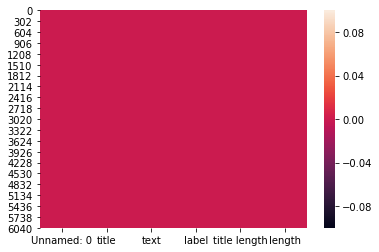

In [107]:
sns.heatmap(df.isnull())

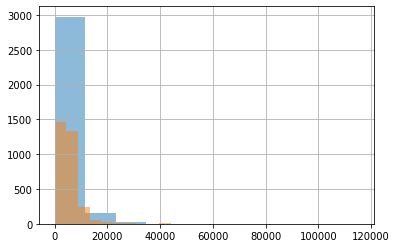

In [108]:
df[df['label']=='FAKE']['length'].hist(alpha=0.5)
df[df['label']=='REAL']['length'].hist(alpha=0.5)

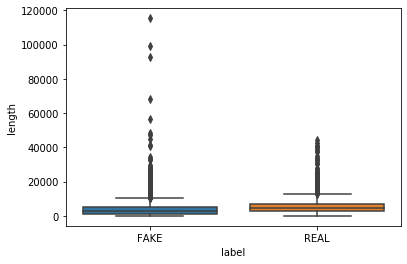

In [109]:
sns.boxplot(x='label',y='length',data=df)

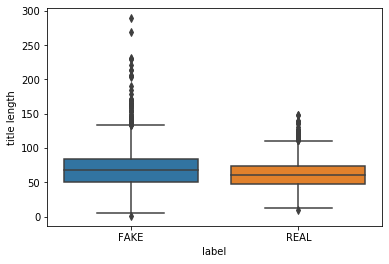

In [110]:
sns.boxplot(x='label',y='title length',data=df)

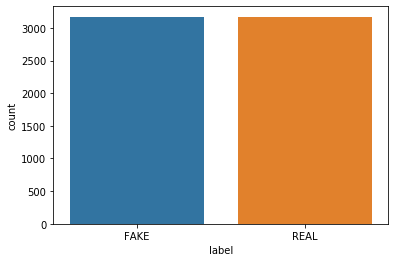

In [111]:
sns.countplot(df['label'])

In [112]:
#DATA is equally distributed

In [113]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [114]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

In [115]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [116]:
from sklearn.pipeline import Pipeline

In [117]:
pipeline=Pipeline([('bow',CountVectorizer(stop_words='english')),
                  ('tfidf',TfidfTransformer()),
                  ('nb',PassiveAggressiveClassifier())])

In [118]:
X=df['text']
y=df['label']

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
en=LabelEncoder()

In [121]:
y=en.fit_transform(y)

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [123]:
X_train.shape

(4434,)

In [124]:
y_train.shape

(4434,)

In [125]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('nb',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early

In [126]:
pred=pipeline.predict(X_test)

In [127]:
print(accuracy_score(y_test,pred))

0.9326670173592846


In [131]:
from sklearn.externals import joblib

C:\Users\ANKIT PC\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [132]:
joblib.dump(pipeline,'review.pkl')

['review.pkl']

In [133]:
pipe=joblib.load('review.pkl')

In [134]:
p=pipe.predict(X_test)

In [135]:
print(p)

[1 1 0 ... 1 0 0]
